### Utilizando SGD, armar un modelo que calcule los pesos w1, w2, y w3 para aproximar la función:
### Y= w1*X2 + w2*X + w3

In [29]:
# Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# Definimos los valores de  X-Y:
n = 10000
x = np.random.uniform(0,4,n)
y = -(x-2)**2 + 3 + .2*np.sin(16*x)
print('parametros objetivo: w1: {}, w2: {}, w3: {}'. format(-1,4,-1))

parametros objetivo: w1: -1, w2: 4, w3: -1


In [65]:
# Definimos la matriz X-Y:
# n = 20
# x = np.arange(n)
# y = 3*np.power(x,2) + 5*x + 15 + np.random.uniform(0,100,n)

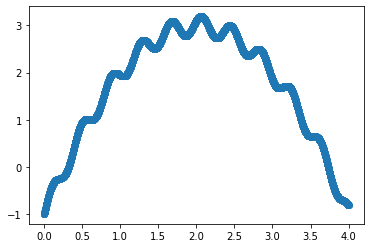

In [66]:
plt.scatter(x,y)

In [102]:
# Inicializamos los pesos y definimos los hiperparámetros del modelo
w3 = 0
np.random.seed(seed=1)

w1, w2 = np.random.uniform(0.2,0.9,2)
#w1 = w3 = -1
#w2 = 4
#epochs = 50000
#lr = 0.000001
epochs = 620
lr = 0.001
minibatch_size = 100
print('parametros iniciales: \n w1= {} \n w2= {} \n w3= {}'.format(w1,w2,w3))

parametros iniciales: 
 w1= 0.4919154032918018 
 w2= 0.7042271454095106 
 w3= 0


In [103]:
le = []
# l = (y - y_hat)2 / 2
# Implementamos las funciones de forward y backpropagation 
for epoch in range(epochs):
    l = 0
    #for i in range(len(x)):
    for i in range(0, x.shape[0], minibatch_size):
        x_mini = x[i:i + minibatch_size]
        y_mini = y[i:i + minibatch_size]
        m = x_mini.shape[0]
 
        #Forward propagation
        y_hat = w1*np.power(x_mini,2) + w2*x_mini + w3
        error = y_mini - y_hat
        mse = np.square(np.subtract(y_mini,y_hat)).mean()
        l = l+mse 
        #Back propagation
        dl_dw3 = -(1/m)*np.sum(error)
        dl_dw2=  -(1/m)*np.dot(x_mini.T, error)
        dl_dw1 = -(1/m)*np.dot((x_mini*x_mini).T, error)
                
        # Actualizamos los parámetros
        w1 = w1 - lr*dl_dw1
        w2 = w2 - lr*dl_dw2
        w3 = w3 - lr*dl_dw3

        
    L = l / (n/minibatch_size)

    le = np.append(le,L)

print('parametros: \n w1= {} \n w2= {} \n w3= {}'.format(w1,w2,w3))


parametros: 
 w1= -0.9688246746812703 
 w2= 3.858136155223996 
 w3= -0.8748199791702739


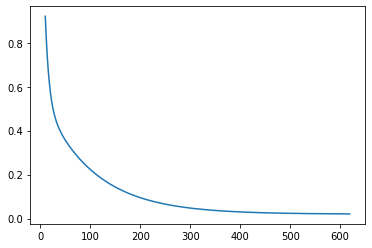

In [104]:
plt.plot(range(10,epochs), le[10:epochs])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


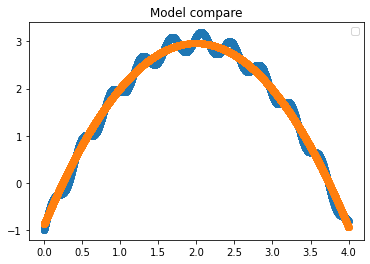

In [105]:

y_ = w1*np.power(x,2) + w2*x + w3 
plt.scatter(x, y)
plt.scatter(x, y_)
plt.title('Model compare')

plt.legend()
plt.show()